In [39]:
import numpy as np
import pandas as pd

In [40]:
df = pd.read_csv('StockHeadlines.csv', encoding = 'ISO-8859-1')

# **Exploring the dataset**

In [41]:
df.columns

Index(['Date', 'Label', 'Top1', 'Top2', 'Top3', 'Top4', 'Top5', 'Top6', 'Top7',
       'Top8', 'Top9', 'Top10', 'Top11', 'Top12', 'Top13', 'Top14', 'Top15',
       'Top16', 'Top17', 'Top18', 'Top19', 'Top20', 'Top21', 'Top22', 'Top23',
       'Top24', 'Top25'],
      dtype='object')

In [42]:
df.shape

(4101, 27)

In [43]:
df.head(5)

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2000-01-03,0,A 'hindrance to operations': extracts from the...,Scorecard,Hughes' instant hit buoys Blues,Jack gets his skates on at ice-cold Alex,Chaos as Maracana builds up for United,Depleted Leicester prevail as Elliott spoils E...,Hungry Spurs sense rich pickings,Gunners so wide of an easy target,...,Flintoff injury piles on woe for England,Hunters threaten Jospin with new battle of the...,Kohl's successor drawn into scandal,The difference between men and women,"Sara Denver, nurse turned solicitor",Diana's landmine crusade put Tories in a panic,Yeltsin's resignation caught opposition flat-f...,Russian roulette,Sold out,Recovering a title
1,2000-01-04,0,Scorecard,The best lake scene,Leader: German sleaze inquiry,"Cheerio, boyo",The main recommendations,Has Cubie killed fees?,Has Cubie killed fees?,Has Cubie killed fees?,...,On the critical list,The timing of their lives,Dear doctor,Irish court halts IRA man's extradition to Nor...,Burundi peace initiative fades after rebels re...,PE points the way forward to the ECB,Campaigners keep up pressure on Nazi war crime...,Jane Ratcliffe,Yet more things you wouldn't know without the ...,Millennium bug fails to bite
2,2000-01-05,0,Coventry caught on counter by Flo,United's rivals on the road to Rio,Thatcher issues defence before trial by video,Police help Smith lay down the law at Everton,Tale of Trautmann bears two more retellings,England on the rack,Pakistan retaliate with call for video of Walsh,Cullinan continues his Cape monopoly,...,South Melbourne (Australia),Necaxa (Mexico),Real Madrid (Spain),Raja Casablanca (Morocco),Corinthians (Brazil),Tony's pet project,Al Nassr (Saudi Arabia),Ideal Holmes show,Pinochet leaves hospital after tests,Useful links
3,2000-01-06,1,Pilgrim knows how to progress,Thatcher facing ban,McIlroy calls for Irish fighting spirit,Leicester bin stadium blueprint,United braced for Mexican wave,"Auntie back in fashion, even if the dress look...",Shoaib appeal goes to the top,Hussain hurt by 'shambles' but lays blame on e...,...,Putin admits Yeltsin quit to give him a head s...,BBC worst hit as digital TV begins to bite,How much can you pay for...,Christmas glitches,"Upending a table, Chopping a line and Scoring ...","Scientific evidence 'unreliable', defence claims",Fusco wins judicial review in extradition case,Rebels thwart Russian advance,Blair orders shake-up of failing NHS,Lessons of law's hard heart
4,2000-01-07,1,Hitches and Horlocks,Beckham off but United survive,Breast cancer screening,Alan Parker,Guardian readers: are you all whingers?,Hollywood Beyond,Ashes and diamonds,Whingers - a formidable minority,...,Most everywhere: UDIs,Most wanted: Chloe lunettes,Return of the cane 'completely off the agenda',From Sleepy Hollow to Greeneland,Blunkett outlines vision for over 11s,"Embattled Dobson attacks 'play now, pay later'...",Doom and the Dome,What is the north-south divide?,Aitken released from jail,Gone aloft


*Note: Di sini 'Label' adalah atribut biner yang terdiri dari 
0 - harga saham turun atau tetap sama, 
1 - Harga saham naik.*

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

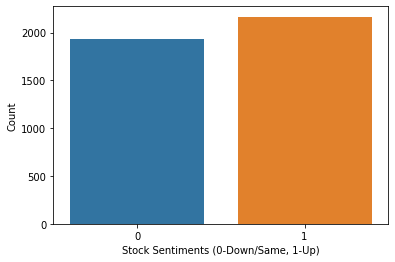

In [19]:
sns.countplot(x='Label', data=df)
plt.xlabel('Stock Sentiments (0-Down/Same, 1-Up)')
plt.ylabel('Count')
plt.show()

# **Data Cleaning and Preprocessing**

In [20]:
print(df.shape)

(4101, 27)


In [22]:
# Menemukan nilai NaN apa pun
df.isna().any()

Date     False
Label    False
Top1     False
Top2     False
Top3     False
Top4     False
Top5     False
Top6     False
Top7     False
Top8     False
Top9     False
Top10    False
Top11    False
Top12    False
Top13    False
Top14    False
Top15    False
Top16    False
Top17    False
Top18    False
Top19    False
Top20    False
Top21    False
Top22    False
Top23     True
Top24     True
Top25     True
dtype: bool

In [23]:
# Drop nilai NaN
df.dropna(inplace=True)
print(df.shape)

(4098, 27)


In [24]:
df_copy = df.copy()

In [25]:
df_copy.reset_index(inplace=True)

In [44]:
# Memisahkan dataset menjadi train set dan test set
train = df_copy[df_copy['Date'] < '20150101']
test = df_copy[df_copy['Date'] > '20141231']
print('Train size: {}, Test size: {}'.format(train.shape, test.shape))

Train size: (3972, 28), Test size: (378, 28)


In [46]:
train.columns

Index(['index', 'Date', 'Label', 'Top1', 'Top2', 'Top3', 'Top4', 'Top5',
       'Top6', 'Top7', 'Top8', 'Top9', 'Top10', 'Top11', 'Top12', 'Top13',
       'Top14', 'Top15', 'Top16', 'Top17', 'Top18', 'Top19', 'Top20', 'Top21',
       'Top22', 'Top23', 'Top24', 'Top25'],
      dtype='object')

In [28]:
# memisahkan dataset
y_train = train['Label']
train = train.iloc[:, 3:28]
y_test = test['Label']
test = test.iloc[:, 3:28]

In [30]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Legion5\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [31]:
# Menghapus tanda baca dan karakter khusus dari teks
train.replace(to_replace='[^a-zA-Z]', value=' ', regex=True, inplace=True)
test.replace(to_replace='[^a-zA-Z]', value=' ', regex=True, inplace=True)

In [32]:
# Mengganti nama kolom
new_columns = [str(i) for i in range(0,25)]
train.columns = new_columns
test.columns = new_columns

In [33]:
# Mengubah seluruh teks menjadi huruf kecil
for i in new_columns:
  train[i] = train[i].str.lower()
  test[i] = test[i].str.lower()

In [52]:
# Bergabung dengan semua kolom
train_headlines = []
test_headlines = []

for row in range(0, train.shape[0]):
  train_headlines.append(' '.join(str(x) for x in train.iloc[row, 0:25]))

for row in range(0, test.shape[0]):
  test_headlines.append(' '.join(str(x) for x in test.iloc[row, 0:25]))

In [55]:
train_headlines[0]

"0 2000-01-03 0 A 'hindrance to operations': extracts from the leaked reports Scorecard Hughes' instant hit buoys Blues Jack gets his skates on at ice-cold Alex Chaos as Maracana builds up for United Depleted Leicester prevail as Elliott spoils Everton's party Hungry Spurs sense rich pickings Gunners so wide of an easy target Derby raise a glass to Strupar's debut double Southgate strikes, Leeds pay the penalty Hammers hand Robson a youthful lesson Saints party like it's 1999 Wear wolves have turned into lambs Stump mike catches testy Gough's taunt Langer escapes to hit 167 Flintoff injury piles on woe for England Hunters threaten Jospin with new battle of the Somme Kohl's successor drawn into scandal The difference between men and women Sara Denver, nurse turned solicitor Diana's landmine crusade put Tories in a panic Yeltsin's resignation caught opposition flat-footed"

In [56]:
test_headlines[0]

'3723 2015-01-02 1 Most cases of cancer are the result of sheer bad luck rather than unhealthy lifestyles, diet or even inherited genes, new research suggests. Random mutations that occur in DNA when cells divide are responsible for two thirds of adult cancers across a wide range of tissues. Iran dismissed United States efforts to fight Islamic State as a ploy to advance U.S. policies in the region: "The reality is that the United States is not acting to eliminate Daesh. They are not even interested in weakening Daesh, they are only interested in managing it" Poll: One in 8 Germans would join anti-Muslim marches UK royal family\'s Prince Andrew named in US lawsuit over underage sex allegations Some 40 asylum-seekers refused to leave the bus when they arrived at their destination in rural northern Sweden, demanding that they be taken back to Malm or "some big city". Pakistani boat blows self up after India navy chase. All four people on board the vessel from near the Pakistani port city

In [57]:
# Membuat kumpulan train dataset
ps = PorterStemmer()
train_corpus = []

for i in range(0, len(train_headlines)):
  
  # Tokenizing judul berita dengan kata-kata
  words = train_headlines[i].split()

  # Menghapus stopwords
  words = [word for word in words if word not in set(stopwords.words('english'))]

  # Merangkai kata-kata
  words = [ps.stem(word) for word in words]

  # Joining the stemmed words
  headline = ' '.join(words)

  # Membangun kumpulan judul berita
  train_corpus.append(headline)

In [38]:
# Creating corpus of test dataset
test_corpus = []

for i in range(0, len(test_headlines)):
  
   # Tokenizing judul berita dengan kata-kata
  words = test_headlines[i].split()

  # Menghapus stopwords
  words = [word for word in words if word not in set(stopwords.words('english'))]

  # Stemming the words
  words = [ps.stem(word) for word in words]

  # Joining the stemmed words
  headline = ' '.join(words)

  # Membangun kumpulan judul berita
  test_corpus.append(headline)

In [60]:
train_corpus[0:10]

["0 2000-01-03 0 a 'hindranc operations': extract leak report scorecard hughes' instant hit buoy blue jack get skate ice-cold alex chao maracana build unit deplet leicest prevail elliott spoil everton' parti hungri spur sens rich pick gunner wide easi target derbi rais glass strupar' debut doubl southgat strikes, leed pay penalti hammer hand robson youth lesson saint parti like 1999 wear wolv turn lamb stump mike catch testi gough' taunt langer escap hit 167 flintoff injuri pile woe england hunter threaten jospin new battl somm kohl' successor drawn scandal the differ men women sara denver, nurs turn solicitor diana' landmin crusad put tori panic yeltsin' resign caught opposit flat-foot",
 "1 2000-01-04 0 scorecard the best lake scene leader: german sleaz inquiri cheerio, boyo the main recommend ha cubi kill fees? ha cubi kill fees? ha cubi kill fees? hopkin 'furious' foster' lack hannib appetit ha cubi kill fees? a tale two tail i say i like i like i say elbows, eye nippl task forc as

In [61]:
test_corpus[0:10]

['case cancer result sheer bad luck rather unhealthi lifestyl diet even inherit gene new research suggest random mutat occur dna cell divid respons two third adult cancer across wide rang tissu iran dismiss unit state effort fight islam state ploy advanc u polici region realiti unit state act elimin daesh even interest weaken daesh interest manag poll one german would join anti muslim march uk royal famili princ andrew name us lawsuit underag sex alleg asylum seeker refus leav bu arriv destin rural northern sweden demand taken back malm big citi pakistani boat blow self india navi chase four peopl board vessel near pakistani port citi karachi believ kill dramat episod arabian sea new year eve accord india defenc ministri sweden hit third mosqu arson attack week car set alight french new year salari top ceo rose twice fast averag canadian sinc recess studi norway violat equal pay law judg say judg find consul employe unjustli paid less male counterpart imam want radic recruit muslim you

In [65]:
down_words = []
for i in list(y_train[y_train==0].index):
  down_words.append(train_corpus[i])

up_words = []
for i in list(y_train[y_train==1].index):
  up_words.append(train_corpus[i])

In [67]:
# # Creating wordcloud for down_words
# from wordcloud import WordCloud
# wordcloud1 = WordCloud(background_color='white', width=3000, height=2500).generate(down_words[1])
# plt.figure(figsize=(8,8))
# plt.imshow(wordcloud1)
# plt.axis('off')
# plt.title("Words which indicate a fall in DJIA ")
# plt.show()

In [68]:
# # Creating wordcloud for up_words
# wordcloud2 = WordCloud(background_color='white', width=3000, height=2500).generate(up_words[5])
# plt.figure(figsize=(8,8))
# plt.imshow(wordcloud2)
# plt.axis('off')
# plt.title("Words which indicate a rise in DJIA ")
# plt.show()

In [69]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=10000, ngram_range=(2,2))
X_train = cv.fit_transform(train_corpus).toarray()

In [70]:
X_test = cv.transform(test_corpus).toarray()

# **Model Building**

## *Logistic Regression*

In [71]:
from sklearn.linear_model import LogisticRegression
lr_classifier = LogisticRegression()
lr_classifier.fit(X_train, y_train)

LogisticRegression()

In [72]:
lr_y_pred = lr_classifier.predict(X_test)

In [73]:
# Accuracy, Precision and Recall
from sklearn.metrics import accuracy_score, precision_score, recall_score
score1 = accuracy_score(y_test, lr_y_pred)
score2 = precision_score(y_test, lr_y_pred)
score3 = recall_score(y_test, lr_y_pred)
print("---- Scores ----")
print("Accuracy score is: {}%".format(round(score1*100,2)))
print("Precision score is: {}".format(round(score2,2)))
print("Recall score is: {}".format(round(score3,2)))

---- Scores ----
Accuracy score is: 83.33%
Precision score is: 0.83
Recall score is: 0.84


In [74]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
lr_cm = confusion_matrix(y_test, lr_y_pred)

In [75]:
lr_cm

array([[154,  32],
       [ 31, 161]], dtype=int64)

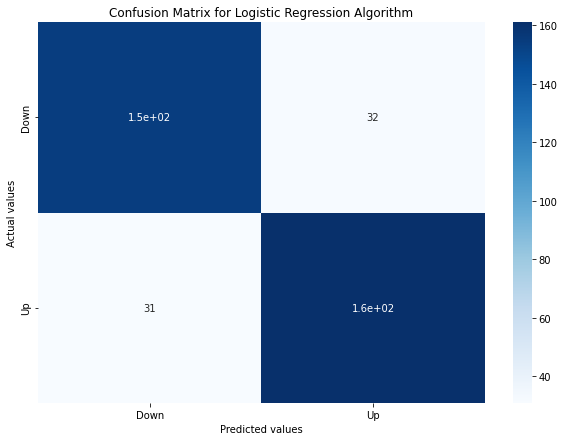

In [76]:
# Plotting the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(data=lr_cm, annot=True, cmap="Blues", xticklabels=['Down', 'Up'], yticklabels=['Down', 'Up'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for Logistic Regression Algorithm')
plt.show()

## *Random Forest Classifier*

In [83]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, criterion='entropy')
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy')

In [84]:
rf_y_pred = rf_classifier.predict(X_test)

In [85]:
# Accuracy, Precision and Recall
score1 = accuracy_score(y_test, rf_y_pred)
score2 = precision_score(y_test, rf_y_pred)
score3 = recall_score(y_test, rf_y_pred)
print("---- Scores ----")
print("Accuracy score is: {}%".format(round(score1*100,2)))
print("Precision score is: {}".format(round(score2,2)))
print("Recall score is: {}".format(round(score3,2)))

---- Scores ----
Accuracy score is: 84.92%
Precision score is: 0.83
Recall score is: 0.88


In [86]:
# Making the Confusion Matrix
rf_cm = confusion_matrix(y_test, rf_y_pred)

In [87]:
rf_cm

array([[152,  34],
       [ 23, 169]], dtype=int64)

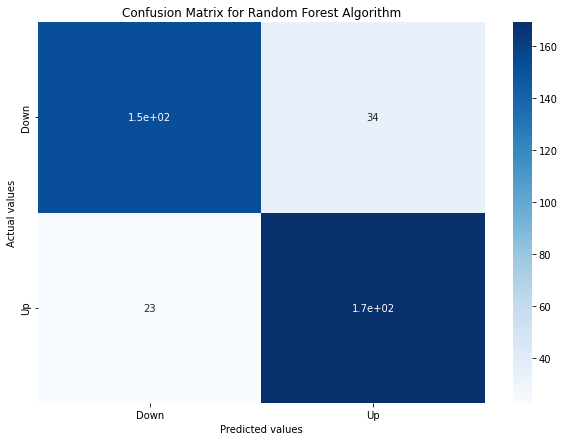

In [88]:
# Plotting the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(data=rf_cm, annot=True, cmap="Blues", xticklabels=['Down', 'Up'], yticklabels=['Down', 'Up'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for Random Forest Algorithm')
plt.show()

## *Multinomial Naive Bayes*

In [89]:
from sklearn.naive_bayes import MultinomialNB
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

MultinomialNB()

In [0]:
# Predicting the Test set results
nb_y_pred = nb_classifier.predict(X_test)

In [123]:
# Accuracy, Precision and Recall
score1 = accuracy_score(y_test, nb_y_pred)
score2 = precision_score(y_test, nb_y_pred)
score3 = recall_score(y_test, nb_y_pred)
print("---- Scores ----")
print("Accuracy score is: {}%".format(round(score1*100,2)))
print("Precision score is: {}".format(round(score2,2)))
print("Recall score is: {}".format(round(score3,2)))

---- Scores ----
Accuracy score is: 83.86%
Precision score is: 0.85
Recall score is: 0.83


In [0]:
# Making the Confusion Matrix
nb_cm = confusion_matrix(y_test, nb_y_pred)

In [125]:
nb_cm

array([[158,  28],
       [ 33, 159]])

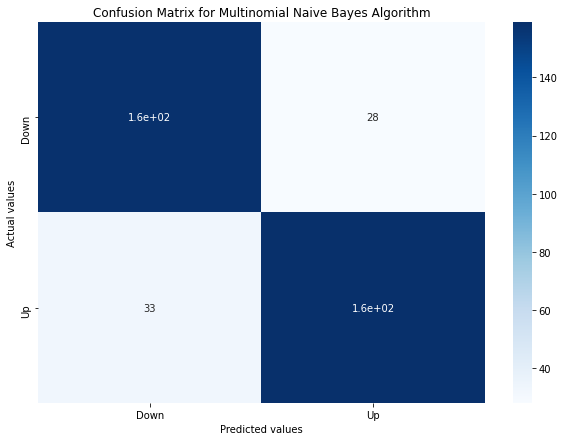

In [126]:
# Plotting the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(data=nb_cm, annot=True, cmap="Blues", xticklabels=['Down', 'Up'], yticklabels=['Down', 'Up'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for Multinomial Naive Bayes Algorithm')
plt.show()

# **Predictions**

In [90]:
import re

def stock_prediction(sample_news):
  sample_news = re.sub(pattern='[^a-zA-Z]',repl=' ', string=sample_news)
  sample_news = sample_news.lower()
  sample_news_words = sample_news.split()
  sample_news_words = [word for word in sample_news_words if not word in set(stopwords.words('english'))]
  ps = PorterStemmer()
  final_news = [ps.stem(word) for word in sample_news_words]
  final_news = ' '.join(final_news)

  temp = cv.transform([final_news]).toarray()
  return lr_classifier.predict(temp)

In [91]:
# For generating random integer
from random import randint

In [92]:
sample_test = df_copy[df_copy['Date'] > '20141231']

In [93]:
sample_test.reset_index(inplace=True)
sample_test = sample_test['Top1']

In [95]:
# Predicting values
row = randint(0,sample_test.shape[0]-1)
sample_news = sample_test[row]

print('News: {}'.format(sample_news))
if stock_prediction(sample_news):
  print('Prediction: The stock price will remain the same or will go down.')
else:
  print('Prediction: The stock price will go up!')

News: China says TPP should be transparent, open
Prediction: The stock price will go up!


In [150]:
# Predicting values
row = randint(0,sample_test.shape[0]-1)
sample_news = sample_test[row]

print('News: {}'.format(sample_news))
if stock_prediction(sample_news):
  print('Prediction: The stock price will remain the same or will go down.')
else:
  print('Prediction: The stock price will go up!')

News: England's Doctors Walk Out of Emergency Wards in First Ever All-Out Strike
Prediction: The stock price will go up!


In [147]:
# Predicting values
row = randint(0,sample_test.shape[0]-1)
sample_news = sample_test[row]

print('News: {}'.format(sample_news))
if stock_prediction(sample_news):
  print('Prediction: The stock price will remain the same or will go down.')
else:
  print('Prediction: The stock price will go up!')

News: Homeopathy conference in Germany ends in chaos after delegates take hallucinogenic drug
Prediction: The stock price will remain the same or will go down.


In [151]:
# Predicting values
row = randint(0,sample_test.shape[0]-1)
sample_news = sample_test[row]

print('News: {}'.format(sample_news))
if stock_prediction(sample_news):
  print('Prediction: The stock price will remain the same or will go down.')
else:
  print('Prediction: The stock price will go up!')

News: Belgium Tells Facebook to Stop Storing Data From Non-Users - Facebook faces a fine of 250,000 euros ($269,000) a day if it doesnt comply
Prediction: The stock price will remain the same or will go down.
